<a href="https://colab.research.google.com/github/ingridmidory/Inferencia-Est-distica/blob/main/Actividad1(MXN_COL)_MonterrosoAlfaro_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### Paso 1. Leer la base de datos de COVID de México
#### https://buomsoo-kim.github.io/colab/2020/05/04/Colab-downloading-files-from-web-2.md/
!wget --timeout=300 --tries=1 "http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip"

--2021-09-30 15:02:09--  http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip
Resolving datosabiertos.salud.gob.mx (datosabiertos.salud.gob.mx)... 187.210.186.146
Connecting to datosabiertos.salud.gob.mx (datosabiertos.salud.gob.mx)|187.210.186.146|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 213187544 (203M) [application/x-zip-compressed]
Saving to: ‘datos_abiertos_covid19.zip’

datos_abiertos_covi 100%[===================>] 203.31M  1.79MB/s    in 41s     

2021-09-30 15:02:50 (4.98 MB/s) - ‘datos_abiertos_covid19.zip’ saved [213187544/213187544]



In [ ]:
#### PASO 2. Convertir a pandas el archibo Zip descagardo de la SS
#####
import pandas as pd
import zipfile

#pandas support zip file reads
covidMx = pd.read_csv("/content/datos_abiertos_covid19.zip", encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#### PASO 3. Leer la base de datos de Colombia
covidCol = pd.read_csv("https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD" , index_col=0, encoding="latin-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Tamaño de las Bases de Datos**


In [ ]:
##México
print(len(covidMx))

10640760


In [ ]:
##Colombia
print(len(covidCol))  

4955848


In [ ]:
covidMx.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [ ]:
covidCol.columns

Index(['ID de caso', 'Fecha de notificaciÃ³n', 'CÃ³digo DIVIPOLA departamento',
       'Nombre departamento', 'CÃ³digo DIVIPOLA municipio', 'Nombre municipio',
       'Edad', 'Unidad de medida de edad', 'Sexo', 'Tipo de contagio',
       'UbicaciÃ³n del caso', 'Estado', 'CÃ³digo ISO del paÃ­s',
       'Nombre del paÃ­s', 'Recuperado', 'Fecha de inicio de sÃ­ntomas',
       'Fecha de muerte', 'Fecha de diagnÃ³stico', 'Fecha de recuperaciÃ³n',
       'Tipo de recuperaciÃ³n', 'Pertenencia Ã©tnica',
       'Nombre del grupo Ã©tnico'],
      dtype='object')

In [ ]:
covidMx.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-09-29,z482b8,2,12,9,2,9,9,12,1,2020-10-16,2020-10-16,9999-99-99,97,2,41,1,97,99,99,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,1,99,MÃ©xico,97,97
1,2021-09-29,z49a69,1,12,23,1,23,23,4,2,2020-07-20,2020-07-17,2020-07-21,1,1,66,1,2,2,2,1,2,2,2,1,2,2,1,2,2,1,2,97,2,97,2,99,MÃ©xico,97,1
2,2021-09-29,z23d9d,1,12,22,2,24,22,9,1,2021-01-05,2021-01-05,9999-99-99,97,2,29,1,97,2,2,2,2,2,2,2,2,2,98,2,2,2,2,97,2,97,6,99,MÃ©xico,97,97
3,2021-09-29,z24953,1,12,9,1,9,9,10,1,2020-10-15,2020-10-15,9999-99-99,97,2,40,1,98,99,99,2,2,2,2,2,2,2,2,2,2,1,1,2,2,97,7,99,MÃ©xico,97,97
4,2021-09-29,zz8e77,2,12,9,2,9,9,2,1,2020-04-16,2020-04-10,9999-99-99,97,2,34,1,97,2,2,2,1,1,2,2,2,2,2,2,2,2,2,97,2,97,6,99,MÃ©xico,97,97


In [ ]:
covidCol.head()

,ID de caso,Fecha de notificaciÃ³n,CÃ³digo DIVIPOLA departamento,Nombre departamento,CÃ³digo DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,UbicaciÃ³n del caso,Estado,CÃ³digo ISO del paÃ­s,Nombre del paÃ­s,Recuperado,Fecha de inicio de sÃ­ntomas,Fecha de muerte,Fecha de diagnÃ³stico,Fecha de recuperaciÃ³n,Tipo de recuperaciÃ³n,Pertenencia Ã©tnica,Nombre del grupo Ã©tnico
fecha reporte web,,,,,,,,,,,,,,,,,,,,,,
6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,Importado,Casa,Leve,724.0,ESPAÃA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5.0,NaN
9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,Importado,Casa,Leve,724.0,ESPAÃA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6.0,NaN
11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6.0,NaN
11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN


**Número de Fallecidos**


In [ ]:
 ##México
 fallecidosMx = covidMx[covidMx['FECHA_DEF']!="9999-99-99"]
 positivosMx  = covidMx[covidMx['CLASIFICACION_FINAL']<=3]

print('FallecidosMx', len(fallecidosMx))

FallecidosMx 354192


In [ ]:
##Colombia
fallecidosCol = covidCol[covidCol['Recuperado']=='Fallecido']
print('FallecidosCol', len(fallecidosCol))

FallecidosCol 125966


Edad Media Fallecidos

In [ ]:
##México
print(fallecidosMx['EDAD'].mean() )

62.59289312011564


In [ ]:
##Colombia
print(fallecidosCol['Edad'].mean())

67.55884127462966


**Edad Media Positivos**


In [ ]:
##México
print(positivosMx['EDAD'].mean())

41.333950229728934


In [ ]:
##Colombia
print(covidCol['Edad'].mean()) 


39.50459134339875


**Desviación Estandar de Pacientes Positivos**





In [ ]:
##México
print(positivosMx['EDAD'].std())

17.212686468401927


In [ ]:
##Colombia
print(covidCol['Edad'].std())

17.9372573118361


**Moda Edad de Pacientes Positivos**

In [ ]:
##México
print(positivosMx['EDAD'].mode())

0    28
dtype: int64


In [ ]:
##Colombia
print(covidCol['Edad'].mode())

0    30
dtype: int64


**Tasa de Mortalidad**

In [ ]:
##México
print(len(fallecidosMx) / 127.6e6 * 100000)

277.5799373040752


In [ ]:
##Colombia
print(len(fallecidosCol) / 50.34e6 * 100000 )

250.23043305522447


**Histograma**

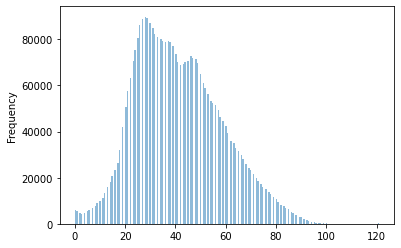

In [ ]:
positivosMx['EDAD'].plot.hist(bins=200, alpha=0.5)

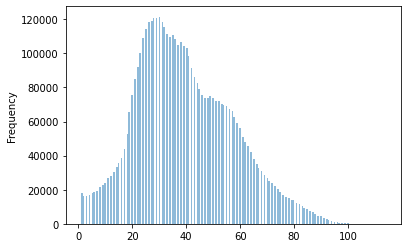

In [ ]:
covidCol['Edad'].plot.hist(bins=200, alpha= 0.5)

**Gráfico de Densidad**


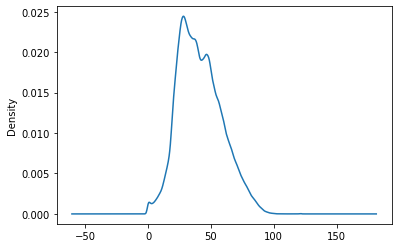

In [ ]:
##México
positivosMx['EDAD'].plot(kind='density') 

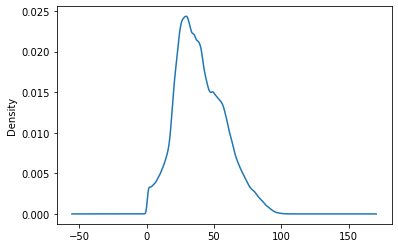

In [ ]:
##Colombia
covidCol['Edad'].plot(kind='density')

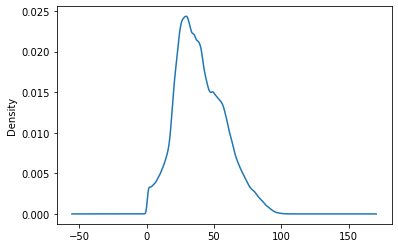

In [ ]:
covidCol['Edad'].plot.kde()

**Box-plot de la Edad por Género**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


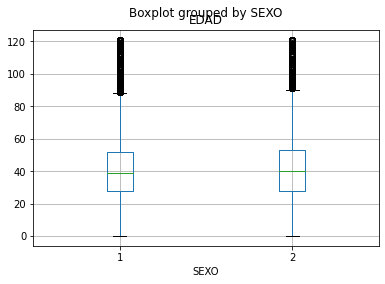

In [ ]:
##México
positivosMx.boxplot(column='EDAD', by='SEXO')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


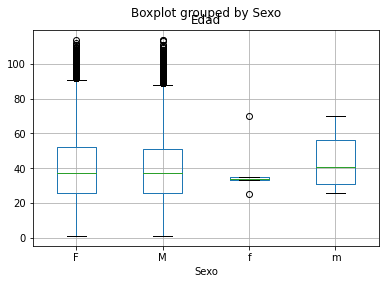

In [ ]:
##Colombia
covidCol.boxplot(column='Edad', by='Sexo')